**Import modules**

In [29]:
from matplotlib import pyplot as plt
import pandas as pd

import sqlite3
import zipfile

plt.style.use('dark_background')

**Read in the wildfire dataset and display columns**

- Download dataset from https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/data
- unzip into /data directory

In [3]:
# extract the zipped dataset

with zipfile.ZipFile('./data/archive.zip', 'r') as zipped:
    zipped.extractall('./data/')

In [4]:
# connect to the sqlite database
conn = sqlite3.connect('data/FPA_FOD_20170508.sqlite')

In [5]:
tables = pd.read_sql_query(
    """
    SELECT name FROM sqlite_master WHERE type='table'
    """
    , conn)

In [6]:
# Print out the table names
tables

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


**Utilizing Fires Table**

In [11]:
# read in the fires table


wildfireDf = pd.read_sql_query(
    """
    SELECT * 
    FROM fires
    WHERE FIRE_YEAR > 2005
    """
    , conn)

**Exploratory Data Analysis**
Display the first 5 rows

In [12]:
wildfireDf.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [13]:
# Describe the dataset
wildfireDf.describe

<bound method NDFrame.describe of         OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0           2259       2274         FS-1423892                FED   
1           5841       5867         FS-1429962                FED   
2           6351       6380         FS-1430814                FED   
3           6372       6401         FS-1430851                FED   
4           6391       6420         FS-1430883                FED   
...          ...        ...                ...                ...   
823509   1880461  300348363  2015CAIRS29019636             NONFED   
823510   1880462  300348373  2015CAIRS29217935             NONFED   
823511   1880463  300348375  2015CAIRS28364460             NONFED   
823512   1880464  300348377  2015CAIRS29218079             NONFED   
823513   1880465  300348399  2015CAIRS26733926             NONFED   

       SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0        FS-FIRESTAT                    FS                USMTBDF   

In [17]:
#TODO: Naveen
#Clean dataframe, later drop columns we don't end up using
# don't drop na


In [14]:
wildfireAnalysisDf = wildfireDf.drop_duplicates()

In [23]:
wildfireAnalysisDf.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [15]:
wildfireAnalysisDf.describe

<bound method NDFrame.describe of         OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0           2259       2274         FS-1423892                FED   
1           5841       5867         FS-1429962                FED   
2           6351       6380         FS-1430814                FED   
3           6372       6401         FS-1430851                FED   
4           6391       6420         FS-1430883                FED   
...          ...        ...                ...                ...   
823509   1880461  300348363  2015CAIRS29019636             NONFED   
823510   1880462  300348373  2015CAIRS29217935             NONFED   
823511   1880463  300348375  2015CAIRS28364460             NONFED   
823512   1880464  300348377  2015CAIRS29218079             NONFED   
823513   1880465  300348399  2015CAIRS26733926             NONFED   

       SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0        FS-FIRESTAT                    FS                USMTBDF   

In [35]:
wildfireAnalysisDf["CONT_DOY"].head()

0     33.0
1    133.0
2    152.0
3    185.0
4    185.0
Name: CONT_DOY, dtype: float64

In [39]:
import datetime
#TODO: Naveen
# investigate convert _DATE columns to Date type


'03/09/8617'

In [ ]:
#TODO: Rajeev
#Visualize fire count by state

In [ ]:
#TODO: Connor
#Visualize lat/lon heatmap

In [ ]:
#TODO: Connor
#Investigate time series heatmap

In [58]:
#TODO: Connor
#Visualize fire count over time
firesOverTimeDf = pd.read_sql_query(
    """
    SELECT FIRE_YEAR, COUNT(*) AS Count
    FROM fires
    GROUP BY FIRE_YEAR
    """
    , conn)


In [19]:
# Check the first 5 rows
firesOverTimeDf.head()

,FIRE_YEAR,Count
0,1992,67975
1,1993,61989
2,1994,75955
3,1995,71472
4,1996,75574


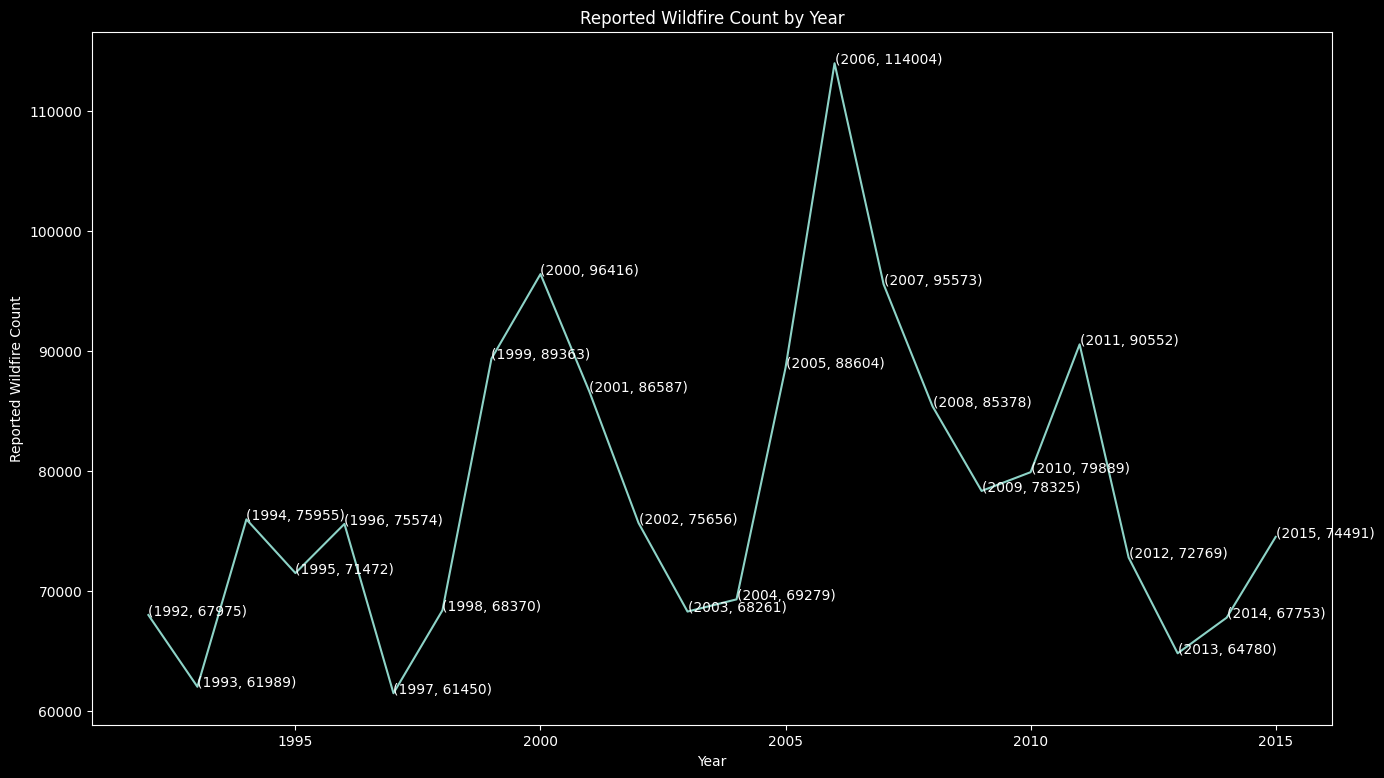

In [61]:
# create plot
fig, ax = plt.subplots(figsize =(16, 9))
ax.plot(firesOverTimeDf["FIRE_YEAR"],firesOverTimeDf["Count"])
plt.xlabel("Year")
plt.ylabel("Reported Wildfire Count")
plt.title("Reported Wildfire Count by Year")
# add annotation to points
for (i, j) in zip(firesOverTimeDf["FIRE_YEAR"],firesOverTimeDf["Count"]):
    plt.text(i, j, f'({i}, {j})')


In [ ]:
#TODO: Naveen
#Visualize avg fire size over time

In [ ]:
#TODO: Rajeev
#Plot fire count by DISCOVERY_DOY, or DISCOVERY_DATE investigate converting to month

In [ ]:
#TODO: Rajeev
#Plot fire count by CONT_DOY, or CONT_DATE investigate converting to month

In [33]:
#TODO: Naveen
#Create a new column of duration of fire (CONT_DOY-DISCOVERY_DOY)

In [ ]:
#TODO: Naveen
#Plot Duration by time
#Plot duration by Fire_Size

In [41]:
#TODO: Connor
#Visualize fire count by STAT_CAUSE_CODE/desc (cause), label with description

fireCausesDf = pd.read_sql_query(
    """
    SELECT STAT_CAUSE_DESCR, COUNT(*) AS Count
    FROM fires
    GROUP BY STAT_CAUSE_DESCR
    ORDER BY COUNT(*) DESC
    """
    , conn)


In [42]:
# Check first 5 rows
fireCausesDf

,STAT_CAUSE_DESCR,Count
0,Debris Burning,429028
1,Miscellaneous,323805
2,Arson,281455
3,Lightning,278468
4,Missing/Undefined,166723
5,Equipment Use,147612
6,Campfire,76139
7,Children,61167
8,Smoking,52869
9,Railroad,33455


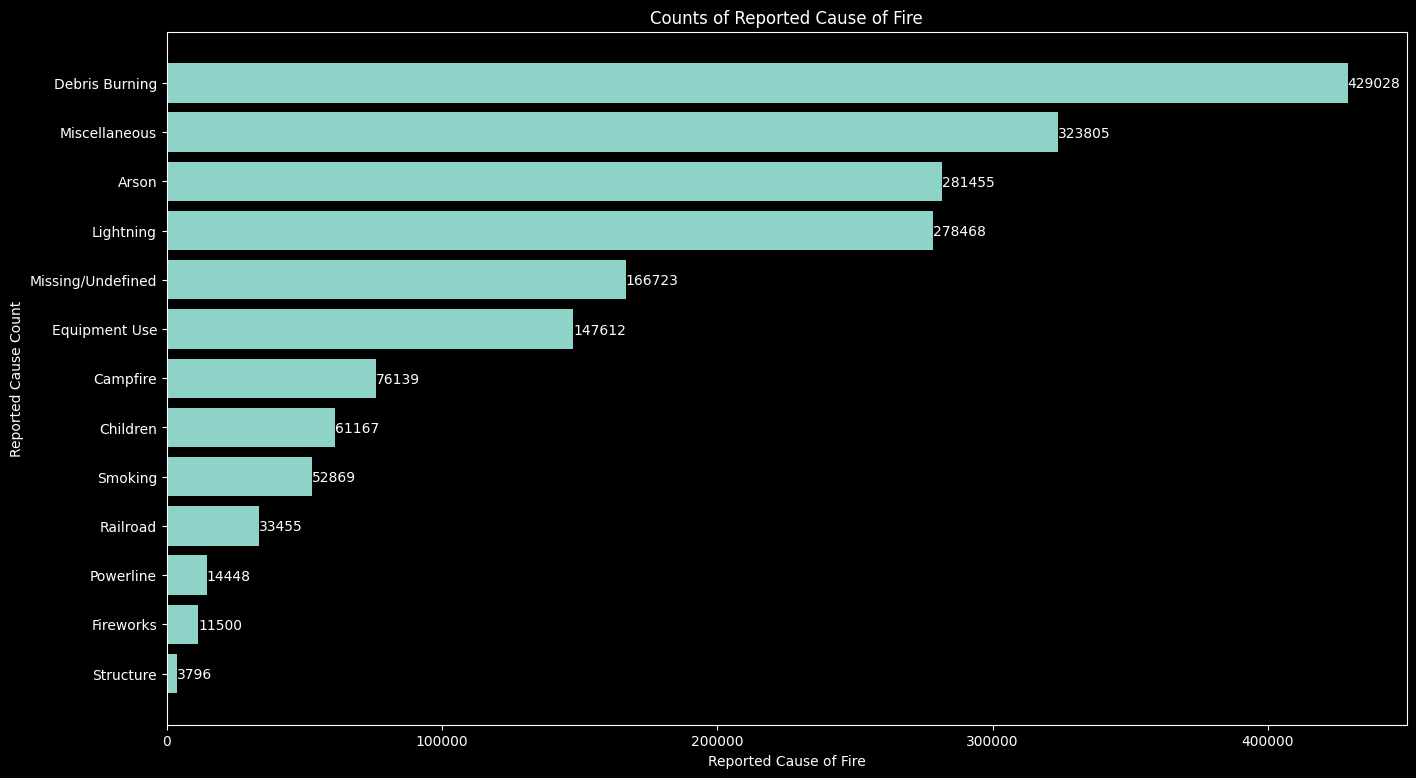

In [55]:
# create plot
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(fireCausesDf["STAT_CAUSE_DESCR"],fireCausesDf["Count"])
# add title and labels
plt.xlabel("Reported Cause of Fire")
plt.ylabel("Reported Cause Count")
plt.title("Counts of Reported Cause of Fire")
# invert order so highest first
plt.gca().invert_yaxis()
# add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
        str(round((i.get_width()), 2)))
